In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Colab Notebooks/global_food_prices.csv'
df = pd.read_csv(file_path)
df.head()


/tmp/ipython-input-3-2680927151.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [4]:
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050638 entries, 0 to 2050637
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   adm0_id             float64
 1   adm0_name           object 
 2   adm1_id             int64  
 3   adm1_name           object 
 4   mkt_id              int64  
 5   mkt_name            object 
 6   cm_id               int64  
 7   cm_name             object 
 8   cur_id              float64
 9   cur_name            object 
 10  pt_id               int64  
 11  pt_name             object 
 12  um_id               int64  
 13  um_name             object 
 14  mp_month            int64  
 15  mp_year             int64  
 16  mp_price            float64
 17  mp_commoditysource  float64
dtypes: float64(4), int64(7), object(7)
memory usage: 281.6+ MB


Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')

In [5]:
# List of redundant ID columns
id_columns = ['adm0_id', 'adm1_id', 'mkt_id', 'cm_id', 'cur_id', 'pt_id', 'um_id']

# Drop these columns if you prefer working with names
df = df.drop(columns=id_columns)

# Now check your remaining columns
print(df.columns)


Index(['adm0_name', 'adm1_name', 'mkt_name', 'cm_name', 'cur_name', 'pt_name',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')


In [6]:
# Check number of data types per column
for col in df.columns:
    types = df[col].apply(type).value_counts()
    if len(types) > 1:
        print(f"\nColumn '{col}' has mixed types:")
        print(types)



Column 'adm1_name' has mixed types:
adm1_name
<class 'str'>      1439622
<class 'float'>     611016
Name: count, dtype: int64


In [7]:
# Count of missing values per column
missing_counts = df.isnull().sum()

# Percentage of missing values
missing_percent = (missing_counts / len(df)) * 100

# Display only columns with missing values
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
})
print(missing_summary[missing_summary['Missing Count'] > 0])


                    Missing Count   Missing %
adm1_name                  611016   29.796385
mp_commoditysource        2050638  100.000000


In [8]:
# Drop rows where price is missing
df = df.dropna(subset=['mp_price'])

# Fill object (text) columns with a placeholder
text_columns = ['adm0_name', 'adm1_name', 'mkt_name', 'cm_name', 'cur_name', 'pt_name', 'um_name']
for col in text_columns:
    df[col] = df[col].fillna('Unknown')

# For mp_commoditysource (numeric), fill with 0 or median
df['mp_commoditysource'] = df['mp_commoditysource'].fillna(0)


In [9]:
# Replace NaN with a string placeholder
df['adm1_name'] = df['adm1_name'].fillna('Unknown')

# Make sure the entire column is string type
df['adm1_name'] = df['adm1_name'].astype(str)


In [10]:
df.rename(columns={
    'adm0_name': 'country',
    'adm1_name': 'region',
    'mkt_name': 'market',
    'cm_name': 'commodity',
    'cur_name': 'currency',
    'pt_name': 'price_type',
    'um_name': 'unit',
    'mp_month': 'month',
    'mp_year': 'year',
    'mp_price': 'price',
    'mp_commoditysource': 'commodity_source'
}, inplace=True)

In [11]:
# Drop rows where price is missing (target variable)
df.dropna(subset=['price'], inplace=True)

In [12]:
# STEP 4: Ensure correct data types
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [13]:
# Drop any rows with invalid month/year/price
df.dropna(subset=['month', 'year', 'price'], inplace=True)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt



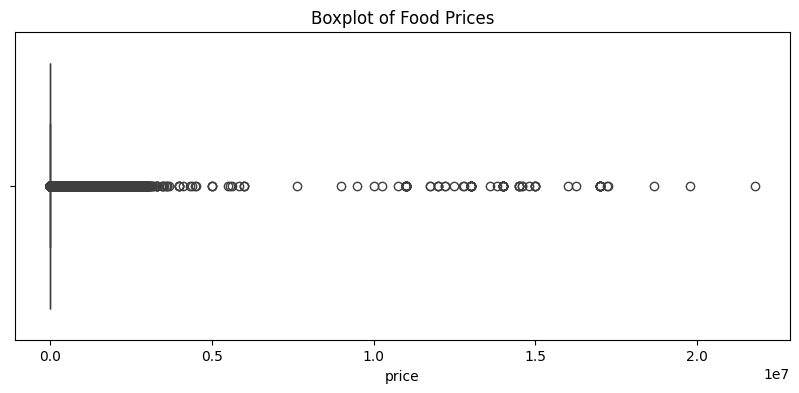

In [15]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Food Prices')
plt.show()


In [16]:
# Using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print("✅ Shape after removing price outliers:", df.shape)


✅ Shape after removing price outliers: (1715983, 11)


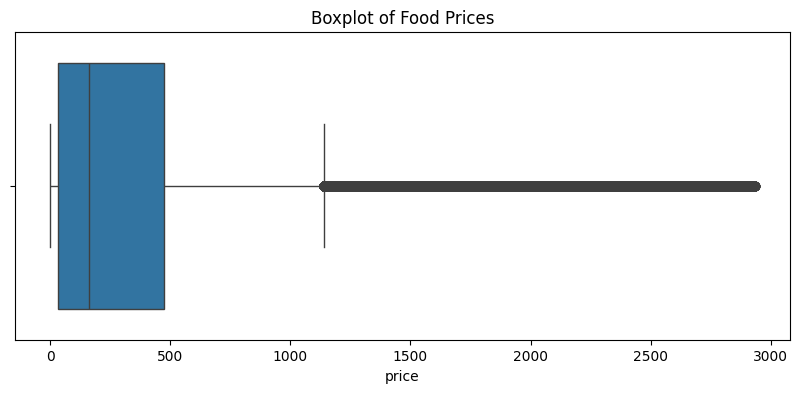

In [17]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Food Prices')
plt.show()

In [18]:
# Optional: Remove outliers (e.g., top 1% price values)
q_high = df['price'].quantile(0.99)
df = df[df['price'] <= q_high]

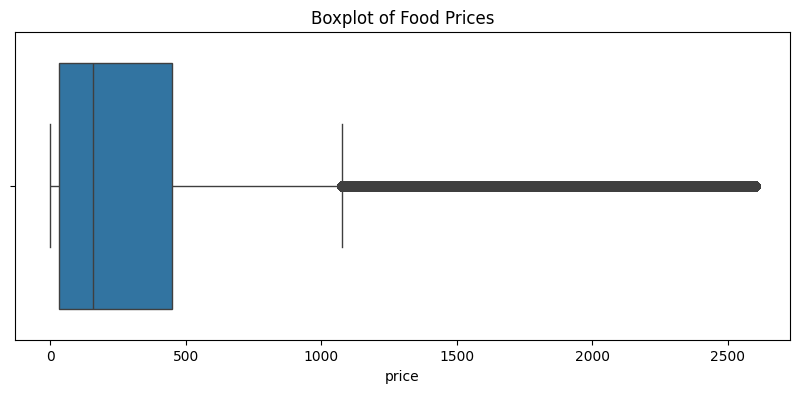

In [19]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Food Prices')
plt.show()

In [20]:
# Using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print("✅ Shape after removing price outliers:", df.shape)


✅ Shape after removing price outliers: (1514861, 11)


In [21]:
# Reset index
df.reset_index(drop=True, inplace=True)


In [22]:
print("Final cleaned data shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isnull().sum())
df.head()

Final cleaned data shape: (1514861, 11)
Columns: ['country', 'region', 'market', 'commodity', 'currency', 'price_type', 'unit', 'month', 'year', 'price', 'commodity_source']
Missing values:
 country             0
region              0
market              0
commodity           0
currency            0
price_type          0
unit                0
month               0
year                0
price               0
commodity_source    0
dtype: int64


,country,region,market,commodity,currency,price_type,unit,month,year,price,commodity_source
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.0,0.0
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.0,0.0
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.0,0.0
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.0,0.0
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.0,0.0


In [23]:
df.to_csv('cleaned_global_food_prices.csv', index=False)

**Exploratory Data Analysis (EDA) — Visualizations**

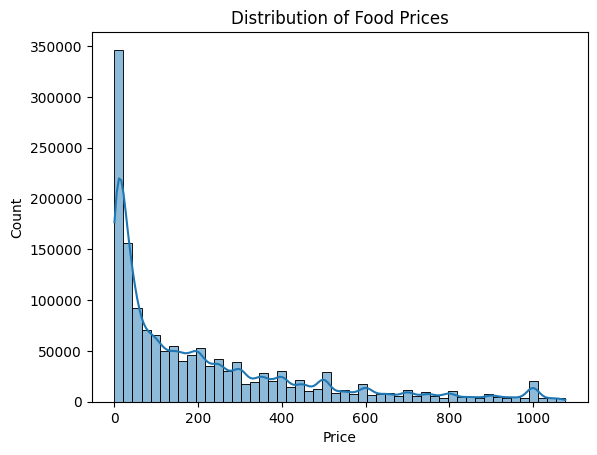

In [24]:
# Price Distribution
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Food Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


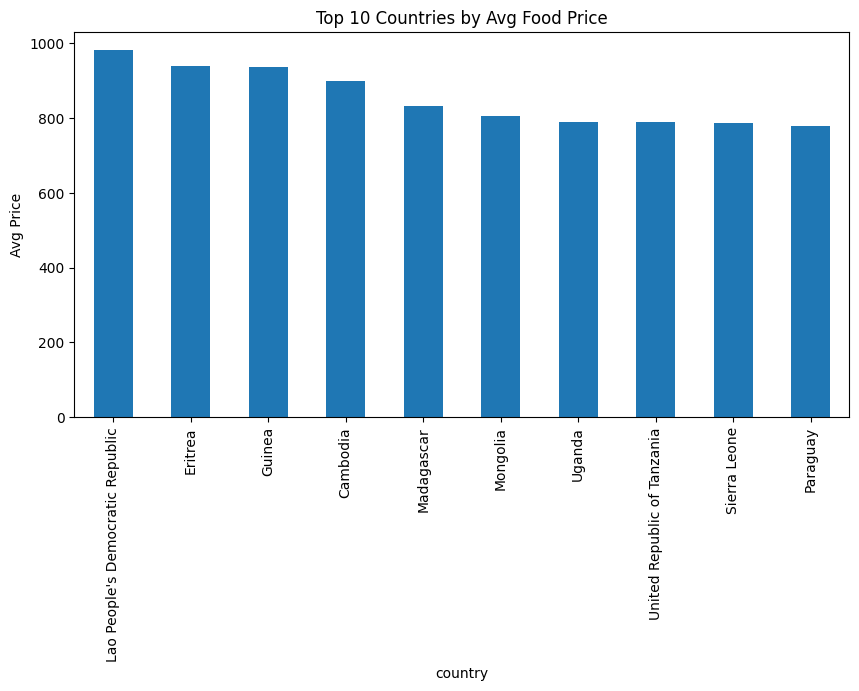

In [25]:
# Average Price by Country (Top 10)
avg_price_country = df.groupby('country')['price'].mean().sort_values(ascending=False).head(10)
avg_price_country.plot(kind='bar', title='Top 10 Countries by Avg Food Price', ylabel='Avg Price', figsize=(10,5))
plt.show()


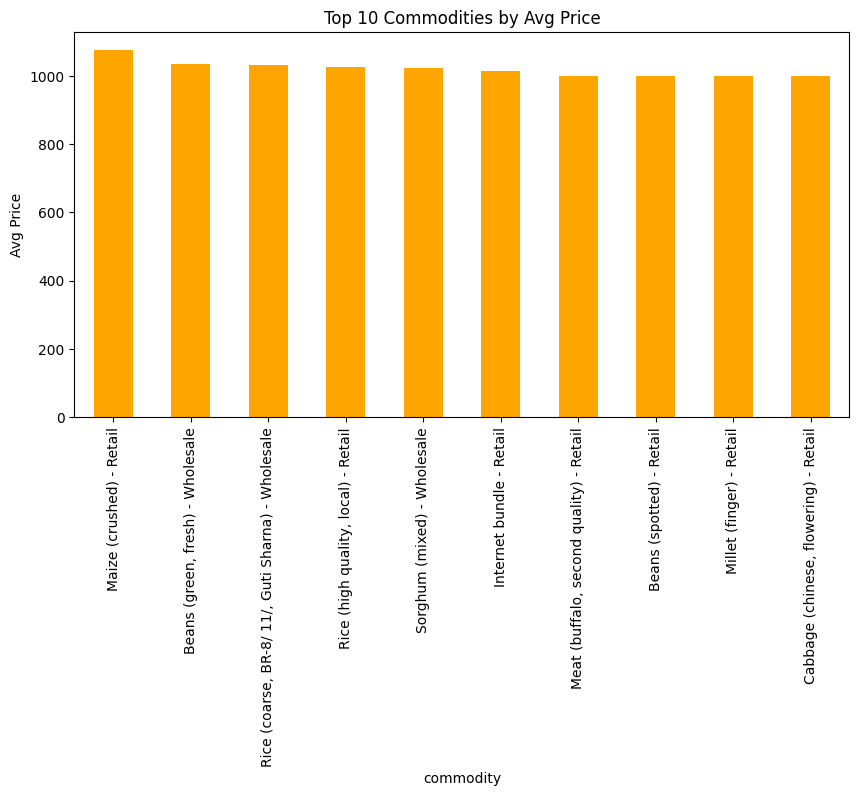

In [26]:
# Average Price by Commodity (Top 10)
avg_price_commodity = df.groupby('commodity')['price'].mean().sort_values(ascending=False).head(10)
avg_price_commodity.plot(kind='bar', title='Top 10 Commodities by Avg Price', ylabel='Avg Price', figsize=(10,5), color='orange')
plt.show()


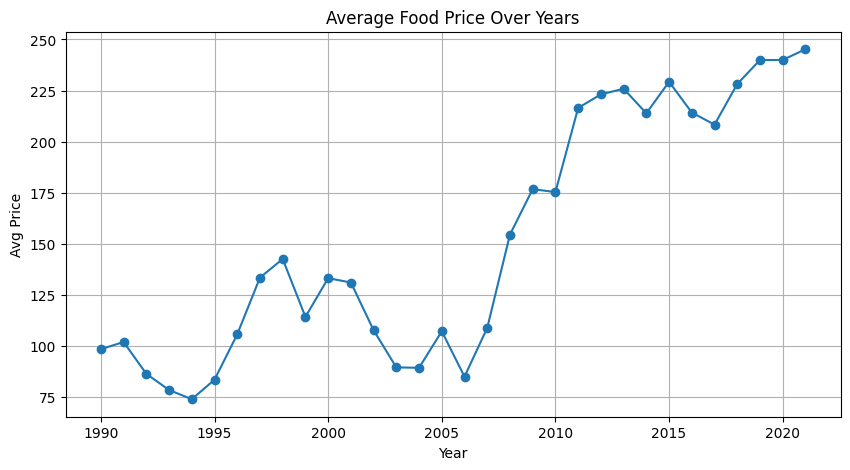

In [27]:
# Price Trend Over Years
avg_price_year = df.groupby('year')['price'].mean()
avg_price_year.plot(marker='o', figsize=(10,5), title='Average Food Price Over Years')
plt.xlabel('Year')
plt.ylabel('Avg Price')
plt.grid(True)
plt.show()


In [28]:
#  Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['month', 'year', 'commodity_source', 'price']] = scaler.fit_transform(df[['month', 'year', 'commodity_source', 'price']])


In [29]:
#  Standard Scaling (Z-score):
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['month', 'year', 'commodity_source', 'price']] = scaler.fit_transform(df[['month', 'year', 'commodity_source', 'price']])


In [30]:
df.to_csv('global_food_prices_cleaned_scaled.csv', index=False)


In [31]:
target = 'price'
features = df.drop(columns=[target])


In [32]:
#Encode Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)


In [ ]:
#Split Dataset into Features and Target
X = df_encoded.drop(columns='price')
y = df_encoded['price']
